In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from pathlib import Path
import numpy as np
import datetime
import glob

# Load Data

#### Expected data folder format:
- Parent folder containing lab data
    - Child folder containing individual HS CSV files
    - Child folder containing individual LS CSV files

In [2]:
dummy_date = "2000-01-01" # Dummy date to synchronize time axes (since only H:M:S is needed)

data_folder = "Cyclone Lab Data 20260209"

project_path = rf"C:\Users\232078\OneDrive - Weir Group PLC\Documents\India_test_data\{data_folder}"

LS_data = os.listdir(os.path.join(project_path, "LS"))

HS_data = os.listdir(os.path.join(project_path, "HS"))

LS_data, HS_data

(['AnalogCMv00.SYN0901019FC1_LSDataLogger_20260209T090830+428.csv',
  'AnalogCMv00.SYN0901019FC1_LSDataLogger_20260209T101405+004.csv'],
 ['RawHS.SYN0901019FC1_Fs4000_T300_20260209T160006.csv',
  'RawHS.SYN0901019FC1_Fs4000_T300_20260209T160506.csv',
  'RawHS.SYN0901019FC1_Fs4000_T300_20260209T161006.csv',
  'RawHS.SYN0901019FC1_Fs4000_T300_20260209T161506.csv',
  'RawHS.SYN0901019FC1_Fs4000_T300_20260209T162006.csv',
  'RawHS.SYN0901019FC1_Fs4000_T300_20260209T162506.csv',
  'RawHS.SYN0901019FC1_Fs4000_T300_20260209T163006.csv',
  'RawHS.SYN0901019FC1_Fs4000_T300_20260209T163506.csv',
  'RawHS.SYN0901019FC1_Fs4000_T300_20260209T164006.csv',
  'RawHS.SYN0901019FC1_Fs4000_T300_20260209T164506.csv'])

Concatentate LS_data into one long day

In [3]:
LS_data_continuous = LS_data[:5] # take only the first 5 files, since they are continuous. The rest are separate tests

cols = ["Timestamp", "CL01Flow", "CL01Pressure", "CL01Density"]

dfs = []
for file in LS_data_continuous:
    df = pd.read_csv(Path(project_path) / "LS" / file, usecols=cols)
    dfs.append(df)

LS_whole_day_df = pd.concat(dfs, ignore_index=True)


# Extract hh:mm:ss from "Timestamp"
LS_whole_day_df["Timestamp"] = (
    LS_whole_day_df["Timestamp"]
    .astype(str)
    .str.extract(r"T(\d{6})", expand=False)
)


# convert to datetime.time only if not already in that format
if not isinstance(LS_whole_day_df["Timestamp"].iloc[0], datetime.time):
    LS_whole_day_df["Timestamp"] = pd.to_datetime(LS_whole_day_df["Timestamp"].astype(str).str.zfill(6), format="%H%M%S").dt.time

LS_whole_day_df

,Timestamp,CL01Pressure,CL01Flow,CL01Density
0,09:08:32,0.512711,0.362560,0.0
1,09:08:34,0.512711,0.318613,0.0
2,09:08:36,0.512711,0.208747,0.0
3,09:08:38,0.512711,0.384533,0.0
4,09:08:41,0.512711,0.439467,0.0
...,...,...,...,...
5427,17:49:57,0.146000,0.000000,0.0
5428,17:49:59,0.586000,0.428000,0.0
5429,17:50:01,0.293000,0.363000,0.0
5430,17:50:03,0.293000,0.319000,0.0


# Plotting HS and LS data

In [4]:
# --- Inputs ---
hs_folder = rf"{project_path}\HS"       # folder containing HS csv files
dummy_date = "2000-01-01"
T_minutes = 5                           # filename contains _T300 (300 seconds)


# --- LS timestamp prep ---
LS_whole_day_df['Timestamp'] = LS_whole_day_df['Timestamp'].astype(str)
LS_whole_day_df['Timestamp'] = dummy_date + " " + LS_whole_day_df['Timestamp'] ### RUNNING THIS MULTIPLE TIMES WILL ALTER THE TIMESTAMP UNNECESSARILY, SO BE CAREFUL!!!
LS_whole_day_df['Timestamp'] = pd.to_datetime(LS_whole_day_df['Timestamp'])


# LS_start_time = LS_whole_day_df["Timestamp"].iloc[0]
# LS_end_time   = LS_whole_day_df["Timestamp"].iloc[-1]

LS_time_axis  = LS_whole_day_df["Timestamp"]


# --- Collect HS files ---
hs_files = sorted(glob.glob(os.path.join(hs_folder, "RawHS*.csv")))


In [21]:
start_analysis_time = "16:47:50"
end_analysis_time   = "16:48:15"

# start_analysis_time = "12:27:00" # first HS set for 11/02/2026
# end_analysis_time   = "12:27:20"

print( f"Analysis window: {start_analysis_time} to {end_analysis_time}")

# uncomment the relevant mdates.Locator depending on desired interval
x_axis_ticks_hrs = 1   # x hours
x_axis_ticks_min = 10   # y mins
x_axis_ticks_sec = 10  # z seconds

Analysis window: 16:47:50 to 16:48:15


file: RawHS.SYN0901019FC1_Fs4000_T300_20260209T160006.csv - found 30 CY_1_T+ columns, total 1200000 rows after stacking
Checking HS TimeStamp is correct: ('RawHS.SYN0901019FC1_Fs4000_T300_20260209T160006.csv', '160006')

file: RawHS.SYN0901019FC1_Fs4000_T300_20260209T160506.csv - found 30 CY_1_T+ columns, total 1200000 rows after stacking
Checking HS TimeStamp is correct: ('RawHS.SYN0901019FC1_Fs4000_T300_20260209T160506.csv', '160506')

file: RawHS.SYN0901019FC1_Fs4000_T300_20260209T161006.csv - found 30 CY_1_T+ columns, total 1200000 rows after stacking
Checking HS TimeStamp is correct: ('RawHS.SYN0901019FC1_Fs4000_T300_20260209T161006.csv', '161006')

file: RawHS.SYN0901019FC1_Fs4000_T300_20260209T161506.csv - found 30 CY_1_T+ columns, total 1200000 rows after stacking
Checking HS TimeStamp is correct: ('RawHS.SYN0901019FC1_Fs4000_T300_20260209T161506.csv', '161506')

file: RawHS.SYN0901019FC1_Fs4000_T300_20260209T162006.csv - found 30 CY_1_T+ columns, total 1200000 rows after stack

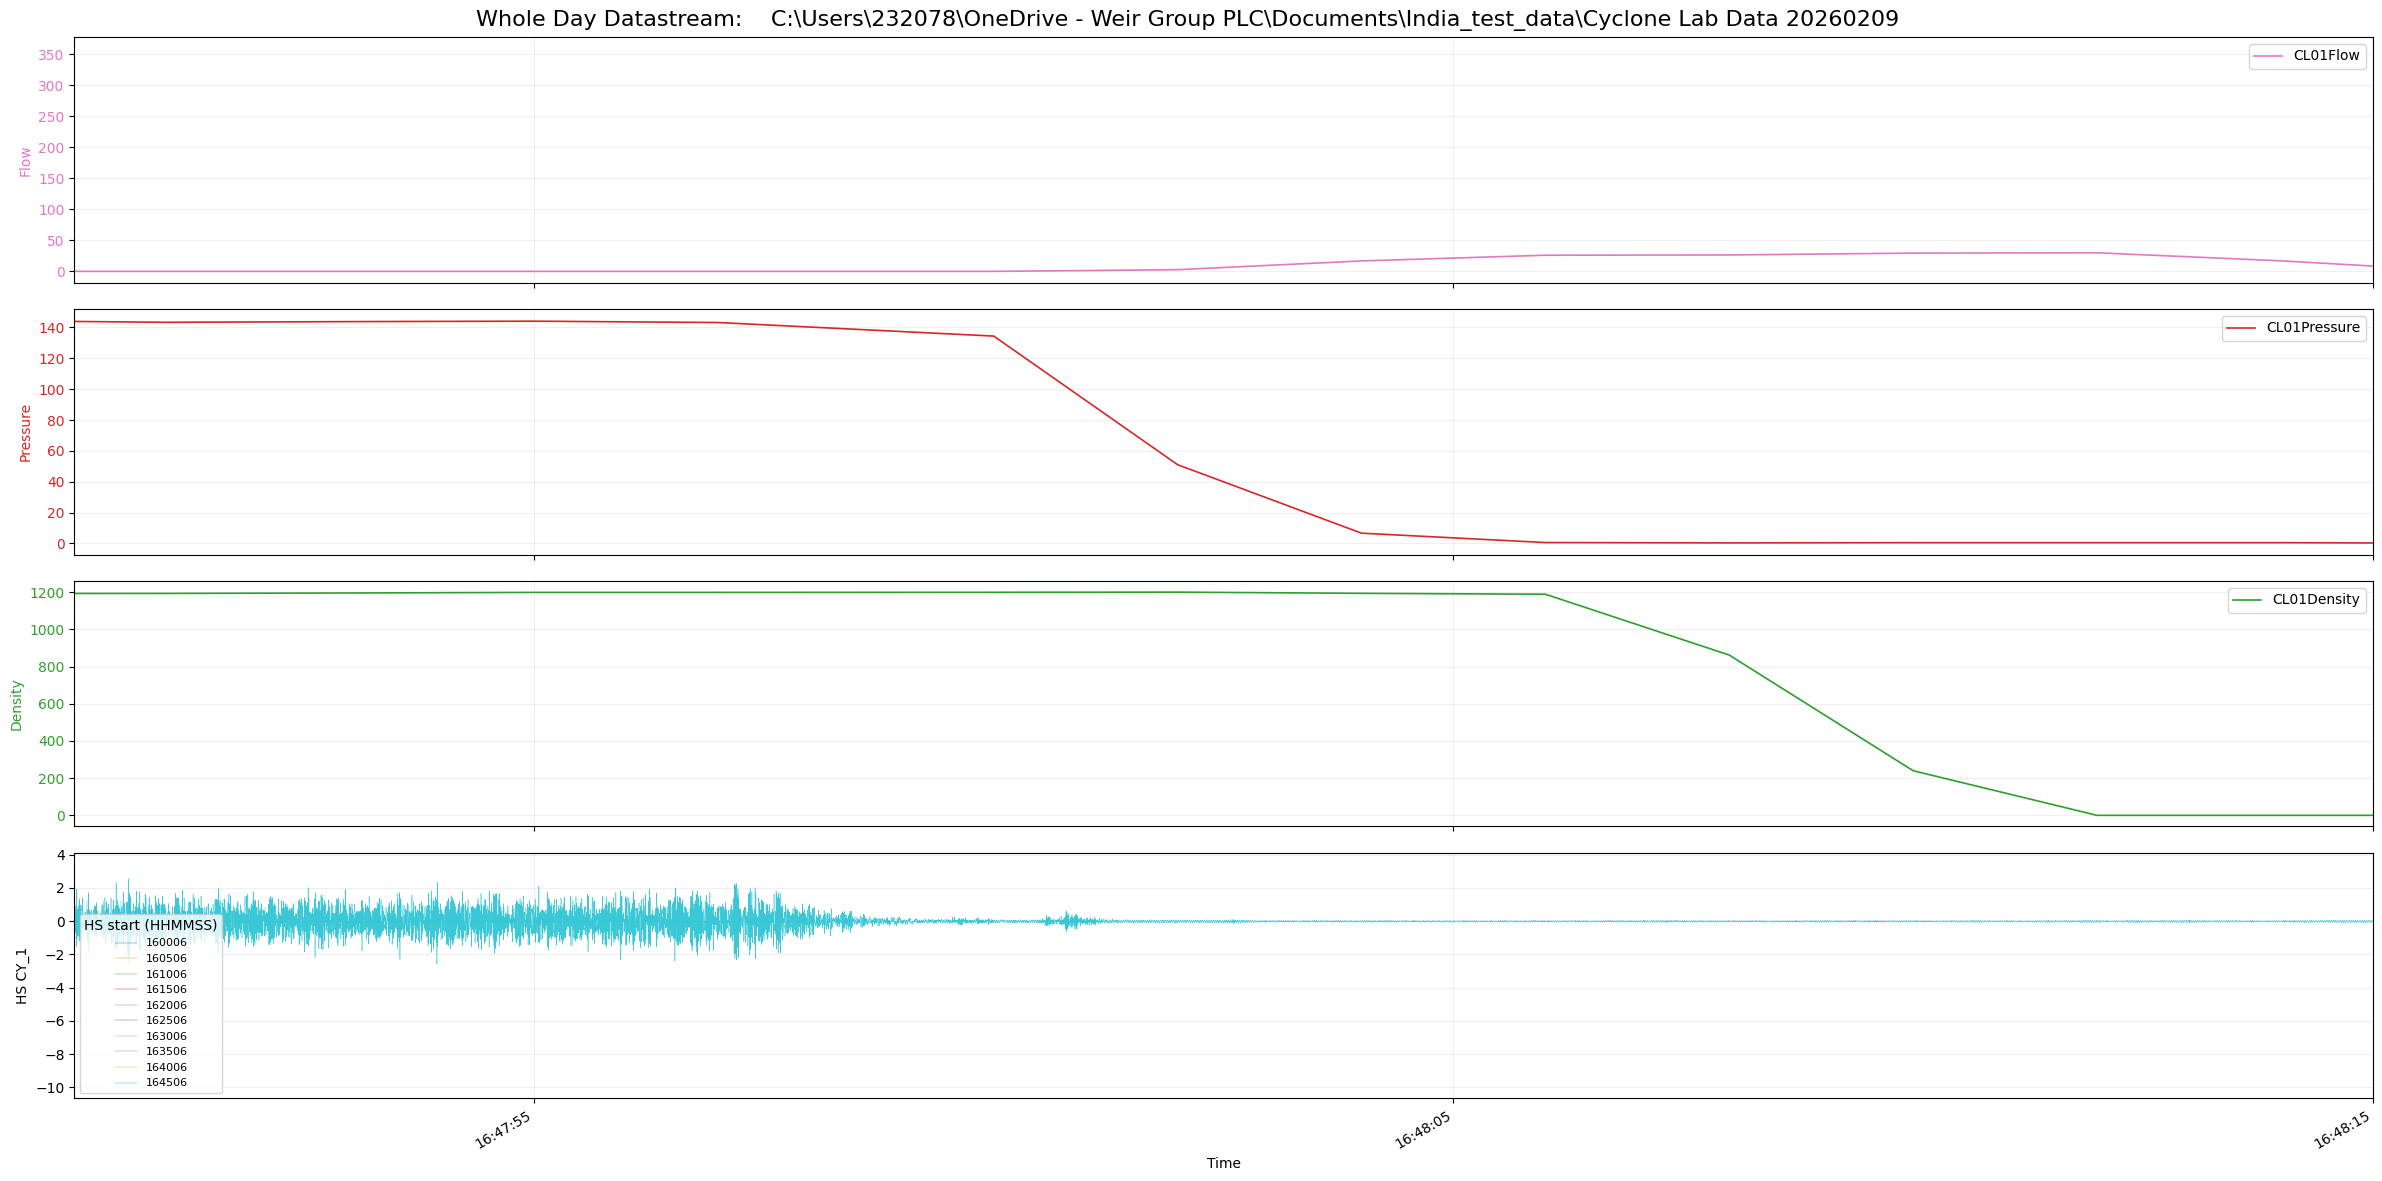

In [22]:
# --- PLOTTING ---
fig, axes = plt.subplots(
    nrows=4, ncols=1,
    figsize=(24, 12),
    sharex=True,
    gridspec_kw={"height_ratios": [1, 1, 1, 1]}
)

ax_flow, ax_press, ax_dens, ax_hs = axes

# ---- Panel 1: Flow ----
ax_flow.plot(LS_time_axis, LS_whole_day_df["CL01Flow"],
             linewidth=1.2, color="tab:pink", label="CL01Flow")
ax_flow.set_ylabel("Flow", color="tab:pink")
ax_flow.tick_params(axis="y", labelcolor="tab:pink")
ax_flow.grid(True, alpha=0.2)
ax_flow.legend(loc="upper right")

# ---- Panel 2: Pressure ----
ax_press.plot(LS_time_axis, LS_whole_day_df["CL01Pressure"],
              linewidth=1.2, color="tab:red", label="CL01Pressure")
ax_press.set_ylabel("Pressure", color="tab:red")
ax_press.tick_params(axis="y", labelcolor="tab:red")
ax_press.grid(True, alpha=0.2)
ax_press.legend(loc="upper right")

# ---- Panel 3: Density ----
ax_dens.plot(LS_time_axis, LS_whole_day_df["CL01Density"],
             linewidth=1.2, color="tab:green", label="CL01Density")
ax_dens.set_ylabel("Density", color="tab:green")
ax_dens.tick_params(axis="y", labelcolor="tab:green")
ax_dens.grid(True, alpha=0.2)
ax_dens.legend(loc="upper right")

# ---- Panel 4: HS concentration (each file overlaid) ----
for hs_file_path in hs_files:
    hs_file = os.path.basename(hs_file_path)
    HS_df = pd.read_csv(hs_file_path)

    cols = [c for c in HS_df.columns if c.startswith("CY_1_T+")]
    if not cols:
        print(f"Skipping {hs_file}: no CY_1_T+ columns found")
        continue

    # HS_df_conc = HS_df[cols].stack().reset_index(drop=True).to_frame("CY_1") ## BUGGED! leads to stacking by row instead of column for some reason
    HS_df_conc = pd.concat([HS_df[c] for c in cols], ignore_index=True).to_frame("CY_1")

    print(f"file: {hs_file} - found {len(cols)} CY_1_T+ columns, total {len(HS_df_conc)} rows after stacking")


    # Parse start time from filename: ..._T300_YYYYMMDDTHHMMSS.csv
    try:
        hhmmss = hs_file.split("_T300")[1].split("T")[1][:6]
        print(f"Checking HS TimeStamp is correct: {hs_file, hhmmss}")
        print('')
    except Exception:
        print(f"Skipping {hs_file}: couldn't parse time from filename")
        continue

    hs_start_time = pd.to_datetime(hhmmss, format="%H%M%S").replace(year=2000, month=1, day=1)
    hs_end_time   = hs_start_time + pd.Timedelta(minutes=T_minutes)

    hs_time_axis = pd.date_range(start=hs_start_time, end=hs_end_time,
                                 periods=HS_df_conc.shape[0])

    ax_hs.plot(hs_time_axis, HS_df_conc["CY_1"],
               linewidth=0.35, alpha=0.85, label=hhmmss)

ax_hs.set_ylabel("HS CY_1")
ax_hs.set_xlabel("Time")
ax_hs.grid(True, alpha=0.2)

# Make HS legend manageable
if len(hs_files) <= 12:
    ax_hs.legend(title="HS start (HHMMSS)", loc="lower left", fontsize=8)

ax_hs.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax_hs.set_xlim(pd.to_datetime(start_analysis_time, format="%H:%M:%S").replace(year=2000, month=1, day=1),
               pd.to_datetime(end_analysis_time, format="%H:%M:%S").replace(year=2000, month=1, day=1))

# ax_hs.xaxis.set_major_locator(mdates.HourLocator(interval=x_axis_ticks_hrs))
# ax_hs.xaxis.set_major_locator(mdates.MinuteLocator(interval=x_axis_ticks_min))
ax_hs.xaxis.set_major_locator(mdates.SecondLocator(interval=x_axis_ticks_sec))

fig.autofmt_xdate()

fig.suptitle(f"Whole Day Datastream:    {project_path}", fontsize=16)
plt.tight_layout()
plt.show()

# GoPro Startimes

Creation date (IST) for GX0101061222.MP4: 2026-02-11 12:22:36+05:30


# HS Data Sanity Checks!

In [7]:
hs_file_path = r"C:\Users\232078\OneDrive - Weir Group PLC\Documents\India_test_data\Cyclone Lab Data 20260209\HS\RawHS.SYN0901019FC1_Fs4000_T300_20260209T164506.csv"

hs_file = os.path.basename(hs_file_path)
HS_df = pd.read_csv(hs_file_path)

cols = [c for c in HS_df.columns if c.startswith("CY_1_T+")]
if not cols:
    print(f"Skipping {hs_file}: no CY_1_T+ columns found")

# HS_df_conc = HS_df[cols].stack().reset_index(drop=True).to_frame("CY_1")
HS_df_conc = pd.concat([HS_df[c] for c in cols], ignore_index=True).to_frame("CY_1")
print(f"file: {hs_file} - found {len(cols)} CY_1_T+ columns, total {len(HS_df_conc)} rows after stacking")

HS_df_conc

file: RawHS.SYN0901019FC1_Fs4000_T300_20260209T164506.csv - found 30 CY_1_T+ columns, total 1200000 rows after stacking


,CY_1
0,-0.00610
1,0.40832
2,0.79772
3,1.09741
4,0.00000
...,...
1199995,-0.04119
1199996,-0.04364
1199997,-0.04302
1199998,-0.04180


<Axes: >

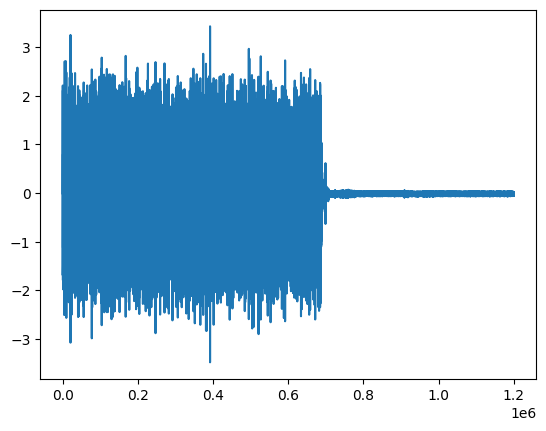

In [23]:
HS_df_conc["CY_1"].plot()

In [10]:
LS_whole_day_df

,Timestamp,CL01Pressure,CL01Flow,CL01Density
0,2000-01-01 09:08:32,0.512711,0.362560,0.0
1,2000-01-01 09:08:34,0.512711,0.318613,0.0
2,2000-01-01 09:08:36,0.512711,0.208747,0.0
3,2000-01-01 09:08:38,0.512711,0.384533,0.0
4,2000-01-01 09:08:41,0.512711,0.439467,0.0
...,...,...,...,...
5427,2000-01-01 17:49:57,0.146000,0.000000,0.0
5428,2000-01-01 17:49:59,0.586000,0.428000,0.0
5429,2000-01-01 17:50:01,0.293000,0.363000,0.0
5430,2000-01-01 17:50:03,0.293000,0.319000,0.0


# FFT Analysis

# Overlapping plots broken. use with caution!
HS timesteps don't align anymore when plotted like this

In [11]:
# # --- Inputs ---
# hs_folder = rf"{project_path}\HS"       # folder containing HS csv files
# dummy_date = "2000-01-01"
# T_minutes = 5                           # filename contains _T300 (300 seconds)

# # --- LS timestamp prep ---
# LS_whole_day_df['Timestamp'] = LS_whole_day_df['Timestamp'].astype(str)
# LS_whole_day_df['Timestamp'] = dummy_date + " " + LS_whole_day_df['Timestamp']
# LS_whole_day_df['Timestamp'] = pd.to_datetime(LS_whole_day_df['Timestamp'])
# LS_time_axis  = LS_whole_day_df["Timestamp"]

# # --- Collect HS files ---
# hs_files = sorted(glob.glob(os.path.join(hs_folder, "RawHS*.csv")))

# # --- Single axis plot ---
# fig, ax = plt.subplots(figsize=(24, 8))

# # ---- Plot LS series on same axis ----
# line_flow,   = ax.plot(LS_time_axis, LS_whole_day_df["CL01Flow"],
#                        linewidth=1.2, color="tab:pink", label="CL01Flow")
# line_press,  = ax.plot(LS_time_axis, LS_whole_day_df["CL01Pressure"],
#                        linewidth=1.2, color="tab:red", label="CL01Pressure")
# line_dens,   = ax.plot(LS_time_axis, LS_whole_day_df["CL01Density"],
#                        linewidth=1.2, color="tab:green", label="CL01Density")

# # ---- Overlay all HS CY_1 on same axis ----
# hs_lines = []
# hs_labels = []
# for hs_file_path in hs_files:
#     hs_file = os.path.basename(hs_file_path)
#     HS_df = pd.read_csv(hs_file_path)

#     cols = [c for c in HS_df.columns if c.startswith("CY_1_T+")]
#     if not cols:
#         print(f"Skipping {hs_file}: no CY_1_T+ columns found")
#         continue

#     HS_df_conc = HS_df[cols].stack().reset_index(drop=True).to_frame("CY_1")

#     # Parse start time from filename: ..._T300_YYYYMMDDTHHMMSS.csv
#     try:
#         hhmmss = hs_file.split("_T300")[1].split("T")[1][:6]
#     except Exception:
#         print(f"Skipping {hs_file}: couldn't parse time from filename")
#         continue

#     hs_start_time = pd.to_datetime(hhmmss, format="%H%M%S").replace(year=2000, month=1, day=1)
#     hs_end_time   = hs_start_time + pd.Timedelta(minutes=T_minutes)

#     hs_time_axis = pd.date_range(start=hs_start_time, end=hs_end_time,
#                                  periods=HS_df_conc.shape[0])

#     # Thinner line for HS overlays
#     ln, = ax.plot(hs_time_axis, HS_df_conc["CY_1"],
#                   linewidth=0.35, alpha=0.85, label=hhmmss)
#     hs_lines.append(ln)
#     hs_labels.append(hhmmss)

# # ---- Axes cosmetics ----
# ax.set_xlabel("Time")
# ax.set_ylabel("Value (shared axis)")
# ax.grid(True, alpha=0.2)
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
# fig.autofmt_xdate()

# # ---- Legend handling ----
# # Combine LS lines plus (optionally) a subset of HS lines to avoid clutter
# legend_lines = [line_flow, line_press, line_dens]
# legend_labels = ["CL01Flow", "CL01Pressure", "CL01Density"]

# # If a manageable number of HS files, include all HS labels; otherwise, skip or include first N
# MAX_HS_IN_LEGEND = 12
# if len(hs_lines) <= MAX_HS_IN_LEGEND:
#     legend_lines += hs_lines
#     legend_labels += [f"HS start {lbl}" for lbl in hs_labels]
# else:
#     # comment out next two lines if you prefer not to list HS at all
#     legend_lines += hs_lines[:MAX_HS_IN_LEGEND]
#     legend_labels += [f"HS start {lbl}" for lbl in hs_labels[:MAX_HS_IN_LEGEND]]

# ax.legend(legend_lines, legend_labels, loc="upper right", fontsize=9, title="Series")

# fig.suptitle(f"Whole Day Datastream (Single Axis):    {project_path}", fontsize=16)
# plt.tight_layout()
# plt.show()